### [다차항회귀] 다음 코드를 무엇을 의미하는지 이해하고 실행하여 결과를 확인하세요.

In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib
import matplotlib.pyplot as plt
import seaborn

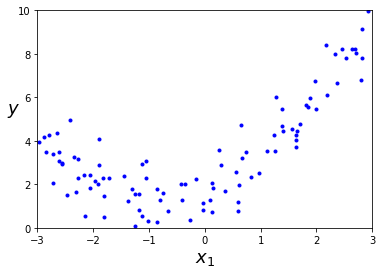

Figure.1


In [2]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3 # X 축은 (-3, 3)의 직선을 가진다.
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # y 축은 X의 대해 아래로 볼록한 원형 그래프를 그린다.
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3,3,0,10])
plt.show()
print("Figure.1")

In [3]:
print(max(np.random.randn(m, 1)))

[3.85273149]


(1) (Figure.1)은 X의 값을 -3에서 3까지 값을 가지는 좌표 직선 위에서 y는 X의 값에 따라 아래로 호가 그려지는 2차원 그래프를 그린다.
이때, y는 평균이 0, 표준편차가 1인 가우시안 분포를 따르는 랜덤한 값에서 X의 승수를 통해 결과적으로 0부터 최대 10까지의 특징을 얻는다.

Figure.2


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

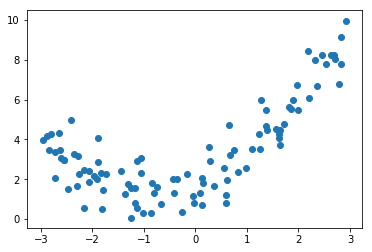

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=2, include_bias=False) #2차 Vector
X_poly = poly_features.fit_transform(X)
#print("--X[0]--\n",X[0],"\n--X_poly[0]--\n", X_poly[0])

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

plt.scatter(X,y)
print("Figure.2")

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

(2) (3)
```
--X[0]--
 [-0.75275929] 
--X_poly[0]--
 [-0.75275929  0.56664654]
```

 지금까지 확인했던 **LinearRegression은 선형 분류를 위한 가장 최적의 직선 방정식을 구하는 해가될 수 있었다.**<br>
직선의 방정식은 입력되는 값에 따라 항상 기울기가 거의 변하지 않기 때문에 일정한 값들을 추론할 수 있는 직선을 그릴 수가 있다.<br>
그러나 (Figure.2)와 같이 **특징의 분포가 2차원 곡선 형태로 분포되어진다면, LinearRegression을 사용하여 특징을 분류하는 것은 지금 당장은 한계가 분명하다.**<br>
이를 해결하기 위해선 우리가 찾아야 할 최적의 직선의 방정식도 2차원 형태로 변화되어야만 하고, 이를 해결해주는 라이브러리가 sklearn의 PolynomialFeatures가 있다.<br>
이 함수를 쓴 **결과 X[0] 과 X_poly[0]의 결과를 출력했으며, 기존의 X의 형태가 transform되어 2차원 vector로 변화됨을 확인**할 수 있다.

--intercepter--
 [1.78134581] 
--coefficient--
 [[0.93366893 0.56456263]]


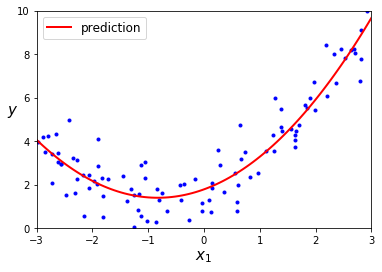

Figure.3


In [5]:
X_new = np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
print("--intercepter--\n", lin_reg.intercept_, "\n--coefficient--\n",lin_reg.coef_)


plt.plot(X,y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="prediction")
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.legend(loc="upper left", fontsize=12)
plt.axis([-3,3,0,10])

plt.show()
print("Figure.3")

(4) 최적의 곡선 함수를 찾기 위한 기울기와 절편의 값은 각각 inetercepter와 coefficient로 구할 수 있다.
실제 바이어스되는(intercepter) 값은 대략 1.78이 될 것이며, coefficient의 값은 2개의 행벡터를 구할 수 있다.
여기서 coefficient 값이 2개인 것은 우리가 2차원(Degree)로 연산했기 때문이며, 따라서 2차항과 일차항의 최적의 값을 확인할 수 있다.


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

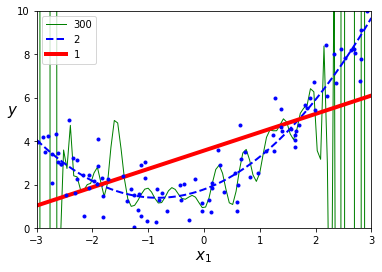

Figure.4


In [7]:
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-", 4, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler() # 
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("line_reg", lin_reg)
    ])
    
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, 
             y_newbig, 
             style, 
             label=str(degree), # linear classify
             linewidth=width # real-time gradients.
            )

    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.axis([-3,3,0,10])

plt.show()
print("Figure.4")

(6) <br>
1. 초록색 선은 가장 최적의 값을 찾기위한 수렴하는 과정의 **스케일 변화량**을 나타낸다.
2. 파란색 선은 전체 분포도에서 표준편차정보를 이용하여 그려진 **2차원 prediction 곡선**을 나타낸다.
3. 빨간색 선은 앞서 가장 먼저 접했던 **선형 분류을 위한 기준이 되는 prediction**이 된다.

여기서 중점적으로 봐야할 것은 단순히 선형 분류를 위한 Prediction이 2차원 분포도를 가지는 그래프 상에서 정상적으로 분류하기가 매우 어렵다는 것을 볼 수 있다. 전형적인 XOR 문제가 될 수 있다.<br>
하지만 파란색 선과 같이 2차원으로 분산된 특징을 분류하기 위한 Polynomial을 이용한 분류를 수행하면, 조금더 유연하게 Prediction을 수행할 수 있다.